In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
URL = 'https://raw.githubusercontent.com/MohamadNach/Machine-Learning-to-Predict-Energy-Consumption/master/events.csv'
df = pd.read_csv(URL)

In [ ]:
df.head()

,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
0,2015-12-31 21:00:00,2015-12-31 22:00:00,2016-01-01 00:00:00,2016-01-01 01:00:00,10800.0
1,2015-12-31 22:00:00,2015-12-31 23:00:00,2016-01-01 01:00:00,2016-01-01 02:00:00,10431.0
2,2015-12-31 23:00:00,2016-01-01 00:00:00,2016-01-01 02:00:00,2016-01-01 03:00:00,10005.0
3,2016-01-01 00:00:00,2016-01-01 01:00:00,2016-01-01 03:00:00,2016-01-01 04:00:00,9722.0
4,2016-01-01 01:00:00,2016-01-01 02:00:00,2016-01-01 04:00:00,2016-01-01 05:00:00,9599.0


In [ ]:
del df["Start time UTC"]
del df["End time UTC"]
del df["Start time UTC+03:00"]
df.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in Finland":"Consumption"},inplace=True)
print(df.head(5))

              DateTime  Consumption
0  2016-01-01 01:00:00      10800.0
1  2016-01-01 02:00:00      10431.0
2  2016-01-01 03:00:00      10005.0
3  2016-01-01 04:00:00       9722.0
4  2016-01-01 05:00:00       9599.0


In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [ ]:
df = df.set_index('DateTime')

In [ ]:
df_resampled = df.resample('30T').mean()

In [ ]:
df_resampled = df_resampled.interpolate(method='linear')


In [ ]:
df_resampled = df_resampled.rename(columns={'electricity_consumption': 'electricity_consumption_30min'})


In [ ]:
df_resampled = df_resampled.reset_index()


In [ ]:
df_resampled.head()

,DateTime,Consumption
0,2016-01-01 01:00:00,10800.0
1,2016-01-01 01:30:00,10615.5
2,2016-01-01 02:00:00,10431.0
3,2016-01-01 02:30:00,10218.0
4,2016-01-01 03:00:00,10005.0


In [ ]:
df_resampled = df_resampled.set_index('DateTime')


In [ ]:
df_resampled1 = df_resampled.resample('15T').mean()

In [ ]:
df_resampled1 = df_resampled1.interpolate(method='linear')


In [ ]:
df_resampled1 = df_resampled1.reset_index()


In [ ]:
df_resampled1.head()

,DateTime,Consumption
0,2016-01-01 01:00:00,10800.00
1,2016-01-01 01:15:00,10707.75
2,2016-01-01 01:30:00,10615.50
3,2016-01-01 01:45:00,10523.25
4,2016-01-01 02:00:00,10431.00


In [ ]:
dataset = df_resampled1
dataset["Month"] = pd.to_datetime(df_resampled1["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df_resampled1["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df_resampled1["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df_resampled1["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(df_resampled1["DateTime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df_resampled1["DateTime"]).dt.day_name()


In [ ]:
dataset.head()

,DateTime,Consumption,Month,Year,Date,Time,Week,Day
0,2016-01-01 01:00:00,10800.00,1,2016,2016-01-01,01:00:00,53,Friday
1,2016-01-01 01:15:00,10707.75,1,2016,2016-01-01,01:15:00,53,Friday
2,2016-01-01 01:30:00,10615.50,1,2016,2016-01-01,01:30:00,53,Friday
3,2016-01-01 01:45:00,10523.25,1,2016,2016-01-01,01:45:00,53,Friday
4,2016-01-01 02:00:00,10431.00,1,2016,2016-01-01,02:00:00,53,Friday


In [ ]:
dataset = df_resampled1.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

In [ ]:
newDataSet = dataset

In [ ]:
print("Old Dataset: ", df.shape)
print("New Dataset: ", newDataSet.shape)

Old Dataset:  (52966, 1)
New Dataset:  (210429, 7)


In [ ]:
newDataSet.head()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-01 01:00:00,10800.00,1,2016,2016-01-01,01:00:00,53,Friday
2016-01-01 01:15:00,10707.75,1,2016,2016-01-01,01:15:00,53,Friday
2016-01-01 01:30:00,10615.50,1,2016,2016-01-01,01:30:00,53,Friday
2016-01-01 01:45:00,10523.25,1,2016,2016-01-01,01:45:00,53,Friday
2016-01-01 02:00:00,10431.00,1,2016,2016-01-01,02:00:00,53,Friday


In [ ]:
newDataSet.tail()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2021-12-31 23:00:00,10599.00,12,2021,2021-12-31,23:00:00,52,Friday
2021-12-31 23:15:00,10652.25,12,2021,2021-12-31,23:15:00,52,Friday
2021-12-31 23:30:00,10705.50,12,2021,2021-12-31,23:30:00,52,Friday
2021-12-31 23:45:00,10758.75,12,2021,2021-12-31,23:45:00,52,Friday
2022-01-01 00:00:00,10812.00,1,2022,2022-01-01,00:00:00,52,Saturday


In [ ]:
y = newDataSet["Consumption"]
print(y[0])
y.shape

10800.0


(210429,)

In [ ]:
# Normalize data before model fitting
# it will boost the performance( in neural networks) + transform
from sklearn.preprocessing import MinMaxScaler
# scale of the output and input inthe range 0-1 to match the scale of the layer of LSTM
scaler = MinMaxScaler(feature_range = (0,1))
# reshape: convert the univariate 1D array into 2D
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])
# y.shape

Normalizing data before model fitting
[[0.55909463]
 [0.54964666]
 [0.54019869]
 [0.53075072]
 [0.52130274]
 [0.51039533]
 [0.49948791]
 [0.4885805 ]
 [0.47767308]
 [0.47042708]]


In [ ]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]
# print(training_size)
# print(test_size)
# print(val_size)
# print(train_data.shape)
# print(test_data.shape)
# print(val_data.shape)

In [ ]:
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 96
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
# print(X_train.shape) # the 100 is time_step
# print(y_train.shape)
# print(X_test.shape)
# print(ytest.shape)
# print(X_val.shape)
# print(yval.shape)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)


X_train shape:  (134578, 96, 1)
X_test shape:  (41989, 96, 1)
X_val shape:  (33571, 96, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (time_step, 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# # Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
# model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = 20 ,batch_size = 20)

Epoch 1/20
6729/6729 [==============================] - 134s 18ms/step - loss: 5.1777e-04 - val_loss: 6.4929e-05
Epoch 2/20
6729/6729 [==============================] - 122s 18ms/step - loss: 6.4271e-05 - val_loss: 6.3039e-05
Epoch 3/20
6729/6729 [==============================] - 124s 18ms/step - loss: 4.6592e-05 - val_loss: 1.8024e-05
Epoch 4/20
6729/6729 [==============================] - 122s 18ms/step - loss: 3.7999e-05 - val_loss: 2.4830e-05
Epoch 5/20
6729/6729 [==============================] - 123s 18ms/step - loss: 3.3433e-05 - val_loss: 3.1171e-05
Epoch 6/20
6729/6729 [==============================] - 130s 19ms/step - loss: 3.0338e-05 - val_loss: 9.4102e-06
Epoch 7/20
6729/6729 [==============================] - 120s 18ms/step - loss: 2.9882e-05 - val_loss: 9.2473e-06
Epoch 8/20
6729/6729 [==============================] - 119s 18ms/step - loss: 2.6841e-05 - val_loss: 9.4614e-06
Epoch 9/20
6729/6729 [==============================] - 129s 19ms/step - loss: 2.5036e-05 - val_

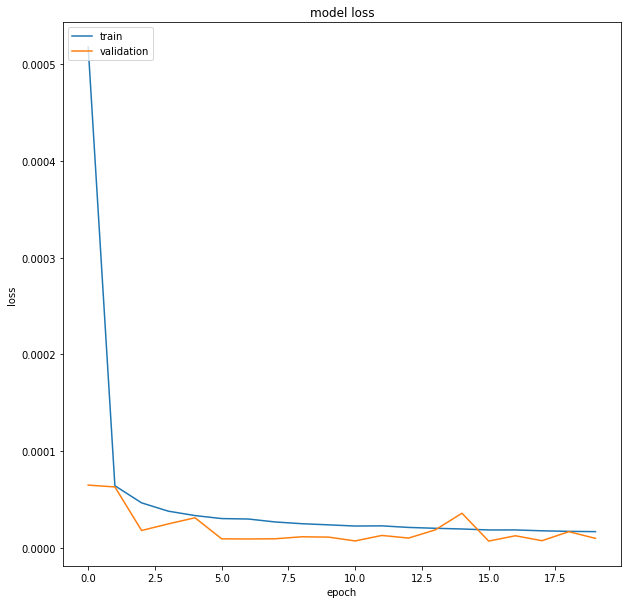

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)

525/525 [==============================] - 3s 5ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math


In [ ]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
val_predict = scaler.inverse_transform(val_predict)


In [ ]:
# Calculate root mean squared error for train, test, and validation sets
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(ytest, test_predict))
val_rmse = math.sqrt(mean_squared_error(yval, val_predict))

# Calculate R2 score for train, test, and validation sets
train_r2 = r2_score(y_train, train_predict)
test_r2 = r2_score(ytest, test_predict)
val_r2 = r2_score(yval, val_predict)

print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Validation RMSE:', val_rmse)
print('Train R2:', train_r2)
print('Test R2:', test_r2)
print('Validation R2:', val_r2)

Train RMSE: 95030749.40672909
Test RMSE: 96154245.15804218
Validation RMSE: 88357019.15529251
Train R2: -3.373813856315615e+17
Test R2: -3.564177016237169e+17
Validation R2: -4.042460931225069e+17


In [ ]:
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()



train_results

4206/4206 [==============================] - 31s 7ms/step


""


In [ ]:
type(actual)

numpy.ndarray

In [ ]:
train_predictions

array([[11129.638],
       [11073.574],
       [10917.736],
       ...,
       [10333.761],
       [10329.958],
       [10326.088]], dtype=float32)

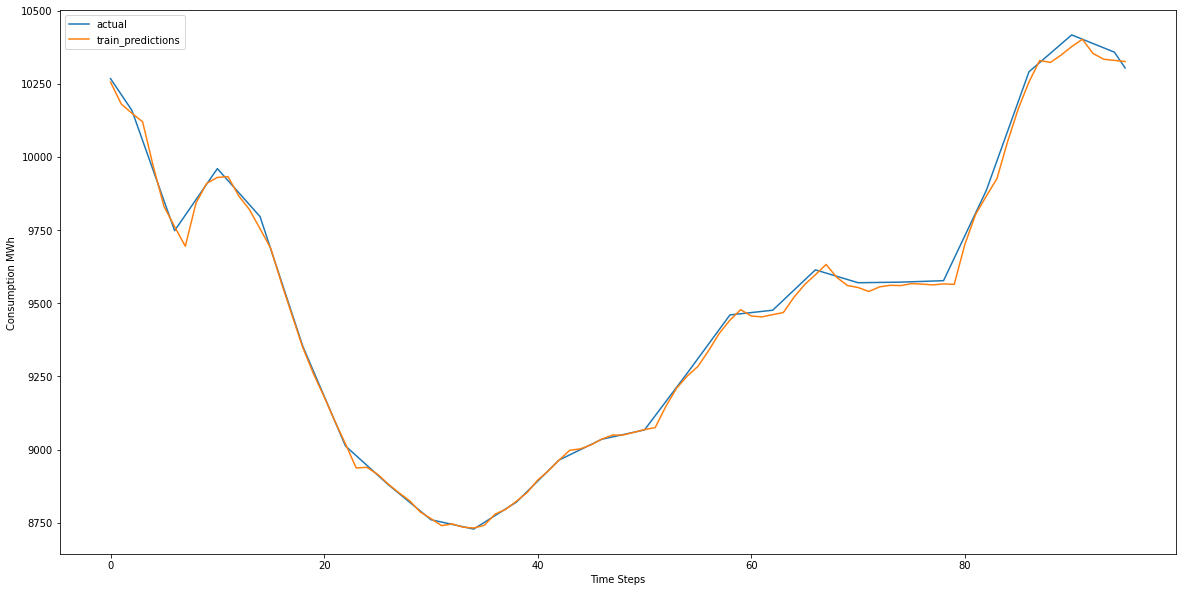

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption



plt.plot(actual[-96:])
plt.plot(train_predictions[-96:])

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

In [ ]:
# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

1313/1313 [==============================] - 12s 9ms/step


,test Predictions,Actuals_test
0,[10129.994140625],[10136.75]
1,[10104.9873046875],[10111.0]
2,[10076.822265625],[10116.5]
3,[10107.1953125],[10122.0]
4,[10122.6015625],[10127.500000000002]
...,...,...
41984,[10672.986328125],[10677.75]
41985,[10611.8046875],[10599.0]
41986,[10546.796875],[10652.25]
41987,[10673.4931640625],[10705.500000000002]


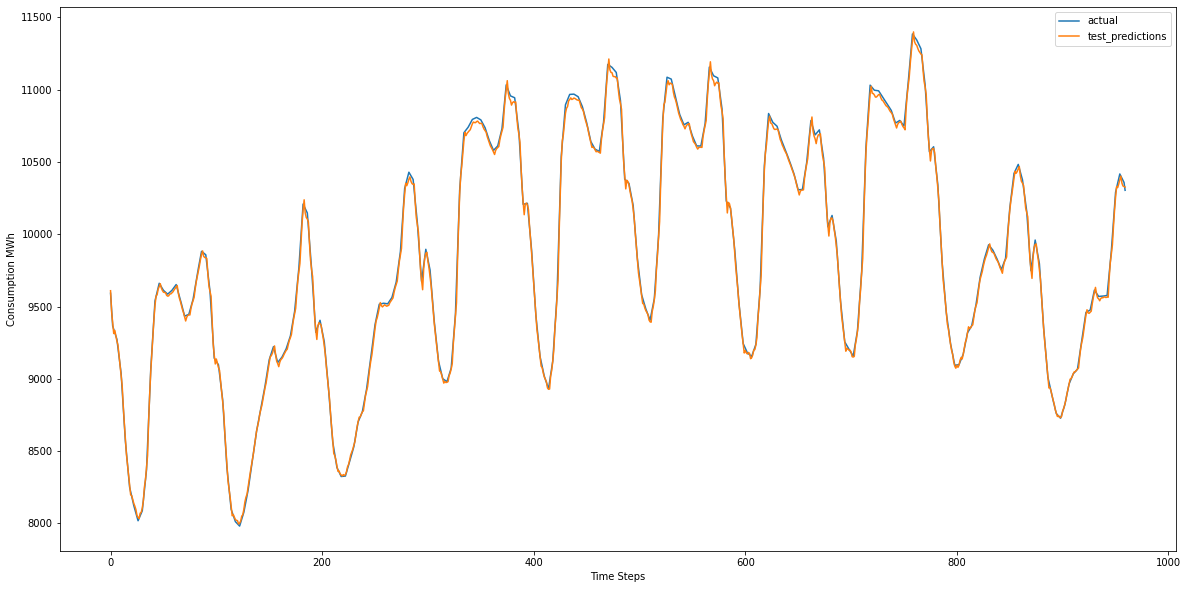

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption



plt.plot(actual[-960:])
plt.plot(train_predictions[-960:])

plt.legend(['actual','test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

In [ ]:
x_input=test_data[-96:].reshape(1,-1)
print(x_input.shape)

(1, 96)


In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps=96
i=0
test = ""
while(i<96):

    if(len(temp_input)>96):
        test = "if"
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} hour input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} hour output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        test="else"
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(test)
print(len(lst_output))

1 hour input [0.58941008 0.58480131 0.58019254 0.56836338 0.55653421 0.54470504
 0.53287587 0.5210467  0.50921753 0.49738837 0.4855592  0.48110406
 0.47664891 0.47219377 0.46773863 0.46627919 0.46481975 0.4633603
 0.46190086 0.46292503 0.4639492  0.46497337 0.46599754 0.47081114
 0.47562474 0.48043834 0.48525195 0.49551925 0.50578656 0.51605387
 0.52632118 0.53146764 0.53661409 0.54176055 0.54690701 0.55435785
 0.56180868 0.56925952 0.57671036 0.57737608 0.57804179 0.5787075
 0.57937321 0.5787075  0.57804179 0.57737608 0.57671036 0.58032057
 0.58393077 0.58754097 0.59115117 0.59212413 0.59309709 0.59407005
 0.59504302 0.59378841 0.5925338  0.59127919 0.59002458 0.59005018
 0.59007579 0.59010139 0.590127   0.5955295  0.600932   0.60633449
 0.61173699 0.61783081 0.62392462 0.63001844 0.63611225 0.63670115
 0.63729005 0.63787894 0.63846784 0.6351905  0.63191315 0.6286358
 0.62535846 0.61998156 0.61460467 0.60922778 0.60385088 0.5955807
 0.58731053 0.57904035 0.57077018 0.56270483 0.554639

210429
[[10790.85044718]
 [10748.48057532]
 [10694.29535055]
 [10606.62010098]
 [10468.71883488]
 [10318.02332592]
 [10167.74858832]
 [10013.39941049]
 [ 9872.42412734]
 [ 9737.93500853]
 [ 9612.53583145]
 [ 9502.14445722]
 [ 9403.4019897 ]
 [ 9315.48463655]
 [ 9235.37686968]
 [ 9161.52043831]
 [ 9094.83574343]
 [ 9034.42100739]
 [ 8977.59184861]
 [ 8927.55439353]
 [ 8886.12383699]
 [ 8852.76417565]
 [ 8825.91861367]
 [ 8808.48133636]
 [ 8805.48326766]
 [ 8814.73296285]
 [ 8833.16775346]
 [ 8863.60296655]
 [ 8909.88839817]
 [ 8968.1649406 ]
 [ 9033.20641565]
 [ 9104.80331063]
 [ 9182.13154221]
 [ 9261.20513105]
 [ 9337.97058821]
 [ 9410.28477323]
 [ 9474.24056506]
 [ 9527.88542163]
 [ 9571.86010265]
 [ 9605.29833126]
 [ 9627.03352904]
 [ 9638.75460124]
 [ 9643.50413799]
 [ 9642.50604272]
 [ 9636.60389507]
 [ 9627.60736108]
 [ 9617.15413177]
 [ 9606.01707625]
 [ 9594.17000544]
 [ 9581.68071997]
 [ 9568.5649333 ]
 [ 9554.63815784]
 [ 9539.69582772]
 [ 9523.49729431]
 [ 9505.7608794 ]
 [ 

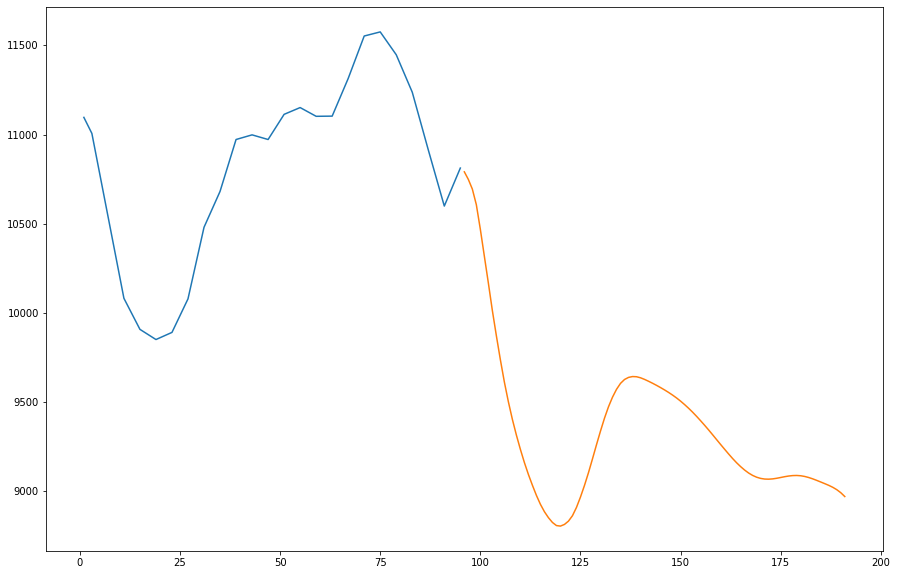

In [ ]:
print(len(y))
day_new=np.arange(1,96)
day_pred=np.arange(96, 192)
plt.figure(figsize = (15,10))
plt.plot(day_new,scaler.inverse_transform(y[-95:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(scaler.inverse_transform(lst_output))
output = scaler.inverse_transform(lst_output)

In [ ]:
output

array([[10790.85044718],
       [10748.48057532],
       [10694.29535055],
       [10606.62010098],
       [10468.71883488],
       [10318.02332592],
       [10167.74858832],
       [10013.39941049],
       [ 9872.42412734],
       [ 9737.93500853],
       [ 9612.53583145],
       [ 9502.14445722],
       [ 9403.4019897 ],
       [ 9315.48463655],
       [ 9235.37686968],
       [ 9161.52043831],
       [ 9094.83574343],
       [ 9034.42100739],
       [ 8977.59184861],
       [ 8927.55439353],
       [ 8886.12383699],
       [ 8852.76417565],
       [ 8825.91861367],
       [ 8808.48133636],
       [ 8805.48326766],
       [ 8814.73296285],
       [ 8833.16775346],
       [ 8863.60296655],
       [ 8909.88839817],
       [ 8968.1649406 ],
       [ 9033.20641565],
       [ 9104.80331063],
       [ 9182.13154221],
       [ 9261.20513105],
       [ 9337.97058821],
       [ 9410.28477323],
       [ 9474.24056506],
       [ 9527.88542163],
       [ 9571.86010265],
       [ 9605.29833126],


In [ ]:
type(output)

numpy.ndarray

In [ ]:
df = pd.DataFrame(output)

In [ ]:
df.to_csv("load_forecasting_next-day.csv")

In [ ]:
model.save('LSTM_load_forecast.h5')